In [10]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

In [2]:

iris_training = pd.read_csv("iris_training.csv")
iris_test = pd.read_csv("iris_test.csv")

In [10]:
iris_training[1:5]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Type
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [6]:
#"Sepal Length","Sepal Width",
train_x=iris_training[["Petal Length","Petal Width"]]
test_x=iris_test[["Petal Length","Petal Width"]]
train_y=pd.DataFrame(iris_training['Type'])
test_y=pd.DataFrame(iris_test['Type'])             

In [4]:
iris_training.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Type
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,5.845000,3.065000,3.739167,1.196667,1.000000
std,0.868578,0.427156,1.822100,0.782039,0.840168
min,4.400000,2.000000,1.000000,0.100000,0.000000
25%,5.075000,2.800000,1.500000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.425000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
iris_training.corr()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Type
Sepal Length,1.000000,-0.076125,0.875830,0.822914,0.786500
Sepal Width,-0.076125,1.000000,-0.387772,-0.324107,-0.393378
Petal Length,0.875830,-0.387772,1.000000,0.962470,0.950742
Petal Width,0.822914,-0.324107,0.962470,1.000000,0.959223
Type,0.786500,-0.393378,0.950742,0.959223,1.000000


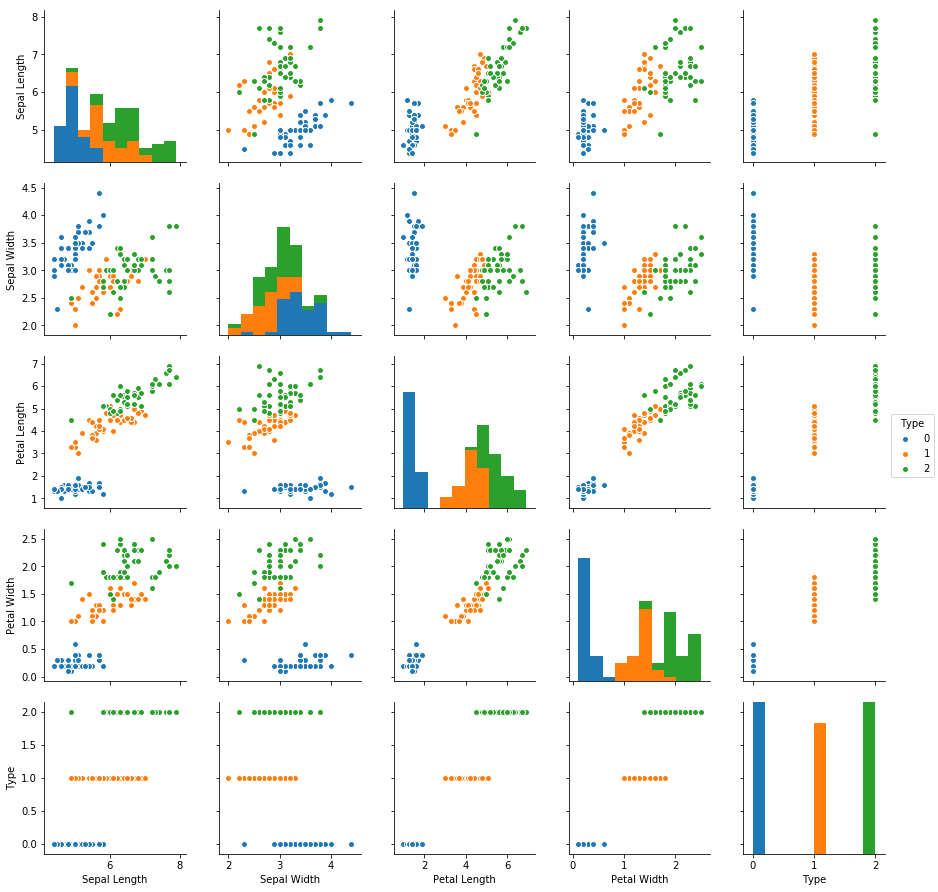

In [23]:
g=sns.pairplot(iris_training, hue="Type", size= 2.5)

In [7]:
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(train_x, train_y)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [12]:
logreg.coef_

array([[ -6.9061118 , -14.37454309],
       [  1.03656861,   1.9607872 ],
       [  5.86954318,  12.41375588]])

In [15]:

Z = logreg.predict(train_x)

In [16]:
accuracy_score(train_y,Z)

0.9583333333333334

In [17]:
p_test = logreg.predict(test_x)
accuracy_score(test_y,p_test)

0.9666666666666667

In [18]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y, p_test)
cnf_matrix

array([[ 8,  0,  0],
       [ 0, 14,  0],
       [ 0,  1,  7]])

In [19]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(train_y, Z)
cnf_matrix

array([[42,  0,  0],
       [ 0, 33,  3],
       [ 0,  2, 40]])